## **Abstract** 

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.

In this notebook we perform classification on whether a machine would be failed or not based on some factors and patterns.


Acknowledgement : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

Dataset has `10000` entries and `8` feature with `6` nominal and `2` categorical features with `3.39` Target `Failure` observations.

 Numerical features : `Air temperature [K]` `Process temperature [K]` `Rotational speed [rpm]` `Torque [Nm]` `Tool wear [min]` `Target`
 
 Categorical features: `Type` `Failure Type`

In [60]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [61]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [62]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing H2O AutoML 

In [64]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,36 mins 13 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_ao29qa
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.162 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [65]:
from h2o.automl import H2OAutoML

In [66]:
df = h2o.import_file('https://raw.githubusercontent.com/Venkata-Bhargavi/AutoML/main/predictive_maintenance%205.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Dataset is placed in github and importing it as a raw file

## Data Description

`UID`: unique identifier ranging from 1 to 10000

`productID`: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number

`Air temperature [K]`: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
`Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

`Rotational speed [rpm]`: calculated from powepower of 2860 W, overlaid with a normally distributed noise

`Torque [Nm]`: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.

`Tool wear [min]`: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.

`Target` : Failure or Not

`Failure Type` : Type of Failure

Acknowledgements

UCI : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [109]:
df.types # checking the data types of all the features

{'\ufeffUDI': 'int',
 'Product ID': 'string',
 'Type': 'enum',
 'Air temperature [K]': 'real',
 'Process temperature [K]': 'real',
 'Rotational speed [rpm]': 'int',
 'Torque [Nm]': 'real',
 'Tool wear [min]': 'int',
 'Target': 'enum',
 'Failure Type': 'enum'}

Here, in this data Target is a categorical feature but represented as integer and should be converted to categorical feature.

In [68]:
df.describe()

Rows:10000
Cols:10

,﻿UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
type,int,string,enum,real,real,int,real,int,int,enum
mins,1.0,NaN,,295.3,305.7,1168.0,3.8,0.0,0.0,
mean,5000.5,NaN,,300.00493,310.00556,1538.7761000000003,39.98690999999997,107.95100000000005,0.033900000000000007,
maxs,10000.0,NaN,,304.5,313.8,2886.0,76.6,253.0,1.0,
sigma,2886.8956799071675,NaN,,2.0002586829158036,1.4837342191657434,179.2840959134266,9.968933725121339,63.654146636636355,0.18098084265065364,
zeros,0,0,,0,0,0,0,120,9661,
missing,0,0,0,0,0,0,0,0,0,0
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,No Failure
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,No Failure
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,No Failure


### Observations from above description

* `Air Temperature` has a mean of 300K and 75% of data is distributed between 295.3K and 301.5K, seems like a good distribution and may not have outliers.
* `Process temperature` has a mean of 310K and maximum data is distributed between 305.7K and 311.1K, looks good and may not have possible outliers.
* `Rotational speed` has a mean 1538 and 75% of data is distribbuted between 1168 and 1612 but the maximum value is 2886 and it looks like investigation is needed to understand outliers and it will be discussed further in this notebook.
* `Torque` has mean 39.9 , maximum value is 76.6, minimum value is 1168 and median is 40.1 which is slightly left skewed from mean.
* `Tool wear` has mean 107.9 and a median(2nd quantile) of 108 which is almost a normal distribution.


All the quantile information 

In [116]:
pdf = pd.read_csv("https://raw.githubusercontent.com/Venkata-Bhargavi/AutoML/main/predictive_maintenance%205.csv")
pdf.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


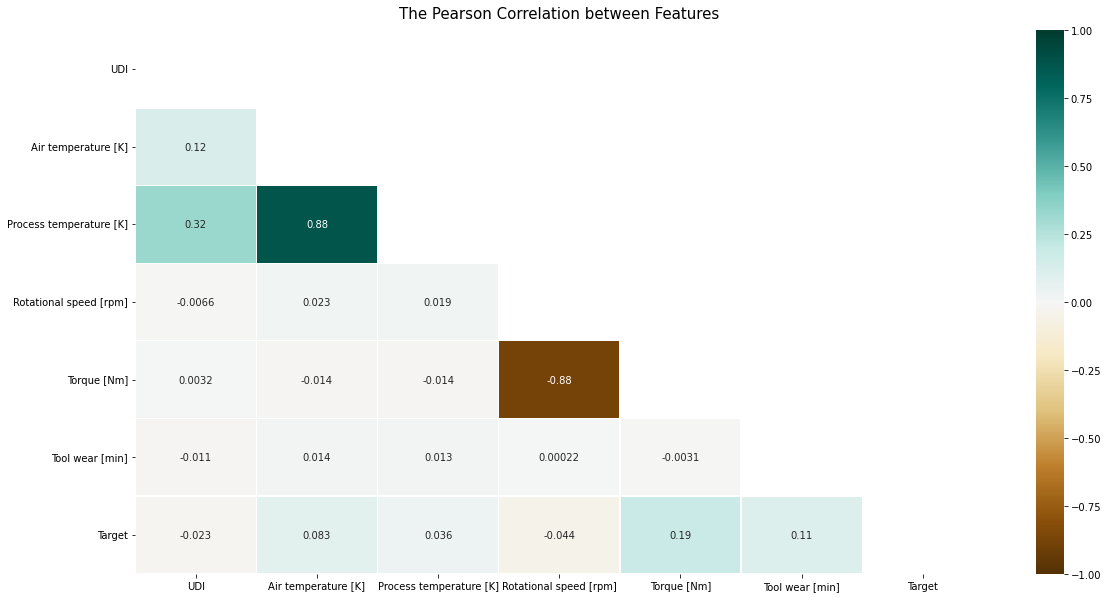

In [121]:
# For Data Visualization
import numpy as np
data_corr = pdf.corr()
mask = np.triu(np.ones_like(pdf.corr(), dtype=bool))
corr_ft = plt.figure(figsize= (19, 10))
corr_ft = sns.heatmap(data_corr, mask=mask,vmin= -1, vmax = 1, annot=True, linewidths= 0.3, cmap= "BrBG")
corr_ft.set_title("The Pearson Correlation between Features",
                   fontsize= 15,
                   pad= 12)
plt.show()

### Observations
- Above heapmap shows that `Air teamperature [k]` and `Process temperature [k]` are highly correlated.
- `Torque` has high correlation comparing to other feature with Target
- `Torque` and `Rotational speed [Nm]` are negatively correlated i.e if Rotational speed increases then Torque decreases and vice versa.
- `Type` has slight correlation with `Rotational speed [Nm]` comparing to other features but it doesn't seem like multi colinearity as the value is very low.


In [69]:
df["Target"] = df["Target"].asfactor()

Converting `Target` column to enum as it is given integer but need to classify it

In [70]:
train,test,valid = df.split_frame(ratios=[.7, .15])

Splitting train test and vailidation into 70:15:15 ratio.

In [71]:
y = "Target"
x = df.columns
x.remove(y)
x.remove("Product ID")
x.remove("Failure Type")
x.remove("\ufeffUDI")

- Here the target feature is `Target` for binary classification.
- Removing `Product ID`, `Failure Type`, `UDI` as product Id and UDI are just unique identifiers and dont contribute for the analysis
- Removing `Failure Type` as it has the failure type information which is similar to target feature and may lead to data leakage

In [72]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


Excluding StackedEnsemble and DeepLearning as it is more complex at this moment and it is also an expensive process

In [101]:
# !nvidia-smi

In [102]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
23:59:41.300: Project: AutoML_3_20221107_235941
23:59:41.300: Cross-validation disabled by user: no fold column nor nfolds > 1.
23:59:41.300: Setting stopping tolerance adaptively based on the training frame: 0.011958266722236254
23:59:41.300: Build control seed: 10
23:59:41.301: training frame: Frame key: AutoML_3_20221107_235941_training_py_21_sid_a03f    cols: 10    rows: 6993  chunks: 8    size: 176492  checksum: -7511266214878178940
23:59:41.304: validation frame: Frame key: py_23_sid_a03f    cols: 10    rows: 1456  chunks: 8    size: 54308  checksum: -1915476153114142194
23:59:41.304: leaderboard frame: Frame key: py_23_sid_a03f    cols: 10    rows: 1456  chunks: 8    size: 54308  checksum: -1915476153114142194
23:59:41.304: blending frame: NULL
23:59:41.304: response column: Target
23:59:41.305: fold column: null
23:59:41.305: weights column: null
23:59:41.305: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g,

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_6_AutoML_4_20221108_12439


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    80                 80                          37616                  7            7            7             12            72            32.675

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0030207200528190826
RMSE: 0.054961077616974385
LogLoss: 0.015464407200018463
Mean Per-Class Error: 0.017173670286515126
AUC: 0.9993151891239668
AUCPR: 0.9919272319930348
Gini: 0.9986303782479335

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29666095801752085
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      6752  4    0.0006   (4.0/6756.0)
1      8     229  0.0338   (8.0/237.0)
Total  6760  233  0.0017   (12.0/6993.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.296661     0.974468  164
max f2                       0.219575     0.973154  173
max f0point5                 0.386869     0.985977  157
max accuracy                 0.309309     0.998284  162
max precision                0.998696     1         0
max recall                   0.0124605    1         333
max specificity              0.998696     1         0
max absolute_mcc             0.296661     0.973618  164
max min_per_class_accuracy   0.117788     0.991561  206
max mean_per_class_accuracy  0.117788     0.991784  206
max tns                      0.998696     6756      0
max fns                      0.998696     236       0
max fps                      0.000319197  6756      399
max tps                      0.0124605    237       333
max tnr                      0.998696     1         0
max fnr                      0.998696     0.995781  0
max fpr                      0.000319197  1         399
max tpr                      0.0124605    1         333

Gains/Lift Table: Avg response rate:  3.39 %, avg score:  3.38 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01001                     0.940838           29.5063    29.5063            1                0.972743     1                           0.972743            0.295359        0.295359                   2850.63   2850.63            0.295359
2        0.02002                     0.862888           29.5063    29.5063            1                0.907889     1                           0.940316            0.295359        0.590717                   2850.63   2850.63            0.590717
3        0.03003                     0.52123            29.5063    29.5063            1                0.75389      1                           0.878174            0.295359        0.886076                   2850.63   2850.63            0.886076
4        0.04004                     0.126458           10.1165    24.6589            0.342857         0.258928     0.835714                    0.723363            0.101266        0.987342                   911.646   2365.89            0.980533
5        0.0500501                   0.0759899          0.421519   19.8114            0.0142857        0.094287     0.671429             

Training the AutoML with training data 

below, gives the leaderboard which has performance of models after training


In [103]:
lb = aml.leaderboard

In [104]:
best_model = aml.get_best_model()

Storing the best model after training on the dataset

In [122]:
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_6_AutoML_4_20221108_12439


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    80                 80                          37616                  7            7            7             12            72            32.675

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0030207200528190826
RMSE: 0.054961077616974385
LogLoss: 0.015464407200018463
Mean Per-Class Error: 0.017173670286515126
AUC: 0.9993151891239668
AUCPR: 0.9919272319930348
Gini: 0.9986303782479335

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29666095801752085
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0   

In [106]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_6_AutoML_4_20221108_12439,0.968168,0.0507689,0.818406,0.146011,0.110199,0.0121438
GBM_2_AutoML_3_20221107_235941,0.968168,0.0507689,0.818406,0.146011,0.110199,0.0121438
GBM_7_AutoML_4_20221108_12439,0.964963,0.0486406,0.859322,0.117521,0.102848,0.0105777
GBM_3_AutoML_3_20221107_235941,0.964963,0.0486406,0.859322,0.117521,0.102848,0.0105777
XGBoost_3_AutoML_3_20221107_235941,0.963031,0.0499266,0.828576,0.107906,0.105204,0.0110679
XGBoost_6_AutoML_4_20221108_12439,0.963031,0.0499266,0.828576,0.107906,0.105204,0.0110679
GBM_8_AutoML_4_20221108_12439,0.958374,0.0501386,0.845997,0.0990028,0.105769,0.011187
GBM_4_AutoML_3_20221107_235941,0.958374,0.0501386,0.845997,0.0990028,0.105769,0.011187
GBM_5_AutoML_4_20221108_12439,0.955005,0.0680771,0.744404,0.132835,0.130225,0.0169585
GBM_1_AutoML_3_20221107_235941,0.955005,0.0680771,0.744404,0.132835,0.130225,0.0169585


Displaying top models in leaderboard

Using best model from leader board to predict on test data

In [77]:
pred=aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [107]:
aml.leader.model_performance(test)  #Checking the best model performance on test data , this is same as using best model above

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.01165769989083747
RMSE: 0.10797082888835054
LogLoss: 0.045557837874566465
Mean Per-Class Error: 0.11299800133244503
AUC: 0.9819786808794138
AUCPR: 0.8117885826525254
Gini: 0.9639573617588275

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2715401530036246
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1492  9    0.006    (9.0/1501.0)
1      11    39   0.22     (11.0/50.0)
Total  1503  48   0.0129   (20.0/1551.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.27154      0.795918  47
max f2                       0.27154      0.78629   47
max f0point5                 0.397276     0.817757  40
max accuracy                 0.301956     0.987105  45
max precision                0.993987     1         0
max recall                   0.0016769    1         320
max specificity              0.993987     1         0
max absolute_mcc             0.27154      0.789439  47
max min_per_class_accuracy   0.0262825    0.936709  136
max mean_per_class_accuracy  0.025215     0.946356  141
max tns                      0.993987     1501      0
max fns                      0.993987     49        0
max fps                      0.000251808  1501      399
max tps                      0.0016769    50        320
max tnr                      0.993987     1         0
max fnr                      0.993987     0.98      0
max fpr                      0.000251808  1         399
max tpr                      0.0016769    1         320

Gains/Lift Table: Avg response rate:  3.22 %, avg score:  3.00 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0103159                   0.932043           31.02     31.02              1                0.958699     1                           0.958699            0.32            0.32                       3002      3002               0.32
2        0.0206319                   0.649858           25.2037   28.1119            0.8125           0.784699     0.90625                     0.871699            0.26            0.58                       2420.38   2711.19            0.578001
3        0.030303                    0.274349           18.612    25.08              0.6              0.477177     0.808511                    0.745788            0.18            0.76                       1761.2    2408               0.754004
4        0.040619                    0.129783           3.8775    19.6952            0.125            0.198939     0.634921                    0.606906            0.04            0.8                        287.75    1869.52            0.784677
5        0.0502901                   0.0908703          0         15.9077            0                0.105646     0.512821                    0.510509            0               0.8                        -100      1490.77            0.774684
6        0.10058                     0.0235395          3.18154   9.54462            0.102564         0.0477265    0.307692                    0.279118            0.16            0.96                       218.154   854.462            0.888048
7        0.150226                    0.00843778         0.402857  6.52352            0.012987         0.0137764    0.2103                      0.19143             0.02            0.98                       -59.7143  552.352            0.857415
8        0.200516             

MSE: 0.01165769989083747

RMSE: 0.10797082888835054

LogLoss: 0.045557837874566465

Mean Per-Class Error: 0.11299800133244503

AUC: 0.9819786808794138

AUCPR: 0.8117885826525254

Gini: 0.9639573617588275




**Here AUC score is close to '1'. This means it is able to separate classes well.**

In [124]:
aml.leader.model_performance(valid) # model performance on validation data

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.012143755017777197
RMSE: 0.11019870696962464
LogLoss: 0.05076886190242359
Mean Per-Class Error: 0.146011396011396
AUC: 0.9681678720140259
AUCPR: 0.8184057386168719
Gini: 0.9363357440280518

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43833384467054226
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1399  5    0.0036   (5.0/1404.0)
1      15    37   0.2885   (15.0/52.0)
Total  1414  42   0.0137   (20.0/1456.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.438334     0.787234  40
max f2                       0.155975     0.797101  66
max f0point5                 0.687081     0.869565  32
max accuracy                 0.49897      0.986264  37
max precision                0.985851     1         0
max recall                   0.000980848  1         360
max specificity              0.985851     1         0
max absolute_mcc             0.438334     0.784974  40
max min_per_class_accuracy   0.0298728    0.923077  143
max mean_per_class_accuracy  0.0583284    0.932336  99
max tns                      0.985851     1404      0
max fns                      0.985851     51        0
max fps                      0.000260583  1404      399
max tps                      0.000980848  52        360
max tnr                      0.985851     1         0
max fnr                      0.985851     0.980769  0
max fpr                      0.000260583  1         399
max tpr                      0.000980848  1         360

Gains/Lift Table: Avg response rate:  3.57 %, avg score:  3.26 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0103022                   0.906607           26.1333   26.1333            0.933333         0.941874     0.933333                    0.941874            0.269231        0.269231                   2513.33   2513.33            0.268519
2        0.0206044                   0.70814            28        27.0667            1                0.821938     0.966667                    0.881906            0.288462        0.557692                   2700      2606.67            0.55698
3        0.0302198                   0.401783           16        23.5455            0.571429         0.54721      0.840909                    0.775412            0.153846        0.711538                   1500      2254.55            0.706553
4        0.040522                    0.194102           7.46667   19.4576            0.266667         0.279656     0.694915                    0.649372            0.0769231       0.788462                   646.667   1845.76            0.775641
5        0.0501374                   0.109413           6         16.8767            0.214286         0.156318     0.60274                     0.554814            0.0576923       0.846154                   500       1587.67            0.825499
6        0.100275                    0.0295479          1.53425   9.20548            0.0547945        0.0534366    0.328767                    0.304125            0.0769231       0.923077                   53.4247   820.548            0.853276
7        0.150412                    0.00880222         0.383562  6.26484            0.0136986        0.0159302    0.223744                    0.20806             0.0192308       0.942308                   -61.6438  526.484            0.821225
8        0.200549            

In [110]:
perf = aml.leader.model_performance(test)
perf.accuracy()

[[0.3019564616010904, 0.9871050934880722]]

In [114]:
# Accuracy from confusion metrics

# total correct predicted observations divided by total observations

acc = (1492 + 39) / (1503+48)
acc

0.9871050934880722

In [112]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])


In [80]:
model_ids

['GBM_2_AutoML_3_20221107_235941',
 'GBM_3_AutoML_3_20221107_235941',
 'XGBoost_3_AutoML_3_20221107_235941',
 'GBM_4_AutoML_3_20221107_235941',
 'GBM_1_AutoML_3_20221107_235941',
 'XGBoost_2_AutoML_3_20221107_235941',
 'XGBoost_1_AutoML_3_20221107_235941',
 'DRF_1_AutoML_3_20221107_235941',
 'XRT_1_AutoML_3_20221107_235941',
 'GLM_1_AutoML_3_20221107_235941']

In [95]:
# h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [82]:
# out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [98]:
best_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_2_AutoML_3_20221107_235941',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_2_AutoML_3_20221107_235941'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20221107_235941_training_py_21_sid_a03f',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20221107_235941_training_py_21_sid_a03f'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20221107_235941_training_py_21_sid_a03f',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20221107_235941_training_py_21_sid_a03f'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_ty

In [99]:
# out.convert_H2OXGBoostParams_2_XGBoostParams()

In [86]:
# out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [96]:
best_model.confusion_matrix()

,0,1,Error,Rate
0,6752.0,4.0,0.0006,(4.0/6756.0)
1,8.0,229.0,0.0338,(8.0/237.0)
Total,6760.0,233.0,0.0017,(12.0/6993.0)


In the above confusion metrics, our positive class is "Failure" i.e "1" and negative class is "Not a Failure" i.e "0" 

- False negative (FN) is less, it means recall is more
- We can be a little lineant in saying that a machine would fail, but cannot cannot falsely inform that machine wouldn't fail, this is why recall is important


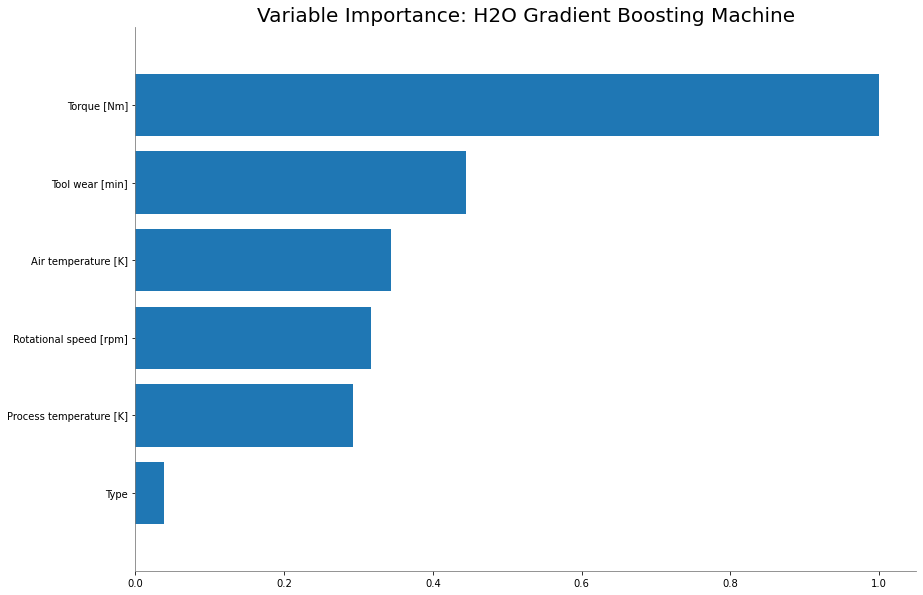

<Figure size 432x288 with 0 Axes>

In [97]:
best_model.varimp_plot()

### Questions and Answers 

1. **Is the relationship significant?**

As mentioned in the Assignment description I didnot perform feature engineering but visualised a pearson correlation heatmap for correlation before one hot encoding
- `Air teamperature [k]` and `Process temperature [k]` are highly correlated.
- `Torque` has high correlation comparing to other feature with Target
- `Torque` and `Rotational speed [Nm]` are negatively correlated i.e if Rotational speed increases then Torque decreases and vice versa.
- `Type` has slight correlation with `Rotational speed [Nm]` comparing to other features but it doesn't seem like multi colinearity as the value is very low.

2. **Are any model assumptions violated?**

As AutoML aims to give best model and tunes hyper parameters for gaining best accuracy. Used H2O.ai to build a maximum of 10 models excluding StackedEnsemble and DeepLearning models with no crossvalidation as validation data is taken from the raw dataset, so automl by default tunes the parameters to get the best model. So, its hard to comment if the AutoML assumptions are violated.

3. **Is there any multicollinearity in the model?**

- `Air teamperature [k]` and `Process temperature [k]` are highly correlated.
- `Torque` and `Rotational speed [Nm]` are negatively correlated i.e if Rotational speed increases then Torque decreases and vice versa.
- `Type` has slight correlation with `Rotational speed [Nm]` comparing to other features but it doesn't seem like multi colinearity as the value is very low.

4. **In the multivariate models are predictor variables independent of all the other predictor variables?**

Few features are independent and some features are dependent on others based on heatmap shown. For examples `Air teamperature [k]` and `Process temperature [k]` are highly colinear.
Moving forward with feature engineering one of this can. be removed but before that , its a best practice to check which has high significance on the model performance through OLS regression. The same can be checked for `Torque` and `Rotational speed [Nm]`

5. **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**

The `varimp_plot()` a H2O.ai function that shows us the most significant predictor variable in a hierarchical manner and `Torque [Nm]` is the most significant in this case

6. **Does the model make sense?**

Yes, the model makes sense. The test and validation error scores are significant with train set scores and Here the accuracy is 98%. 

**ModelMetricsBinomial: gbm**

**Report on Validation set.**

MSE: 0.012143755017777197

RMSE: 0.11019870696962464

LogLoss: 0.05076886190242359

Mean Per-Class Error: 0.146011396011396

AUC: 0.9681678720140259

AUCPR: 0.8184057386168719

Gini: 0.9363357440280518

**ModelMetricsBinomial: gbm**

**Reported on test data.**

MSE: 0.01165769989083747
RMSE: 0.10797082888835054
LogLoss: 0.045557837874566465
Mean Per-Class Error: 0.11299800133244503
AUC: 0.9819786808794138
AUCPR: 0.8117885826525254
Gini: 0.9639573617588275

7. **Does regularization help?**

Here model is not overfitted on test or validation data and it may not require regularization in this case.

8. **Which independent variables are significant?**

All the features shows significant importance in prediction. As mentioned in the description of the assignment encoding is not performed on categorical features, doing this would help us get the significant features through permutation importance.

9. **Which hyperparameters are important?**

max_models will let us see the number of models to be trained and display on the dataset , nfolds helps in mentioning the number of parts the dataset to be divided, exclude_algos are important by helping us not considering deep learning models if the data is not too complex, 

### Conclusion :

- The dataset has a categorical target feature that has "Failure" and "not a Failure" classes and predicting "not a Failure" case is more sensitive as it may mislead and not warn the user for potential machinary failures
- `Failure Type` is removed as it has the information about target variable and may lead to data leakage
- H2O AutoML showed good performance in many models and the top one is GBM for classifiation for  our current dataset
- Confusion metrics shows that there is low False negatives which is a good sign by giving high recall
- `Torque [Nm]` shows high importance over other features and the least important feature is shown as `Type` a categorical feature
- Accuracy is 98% based on the calculation mentioned in below confusion metrics

### Refrences:

1. H2O.ai documentation https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
2. H2O.ai notebook reference on a different dataset for classification https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb#scrollTo=vOxeivTyUCeq
3. H2O.ai model explainability https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html
4. Confusion metrics https://en.wikipedia.org/wiki/Confusion_matrix

**All other code and function implementation are independently written.**


Copyright 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.